In [15]:
# import the necessary packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
# load the low resolution world map
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [9]:
world.head(20)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Country,Temp_Increase
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",NaN,NaN
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",NaN,NaN
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,1.4
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States of America,1.2
5,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,...,None,None,None,None,None,None,None,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",NaN,NaN
6,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,1,Uzbekistan,...,None,None,None,None,None,None,None,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",NaN,NaN
7,Admin-0 country,1,2,Papua New Guinea,PNG,0,2,Sovereign country,1,Papua New Guinea,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",NaN,NaN
8,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,1.0
9,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...",NaN,NaN


<Axes: >

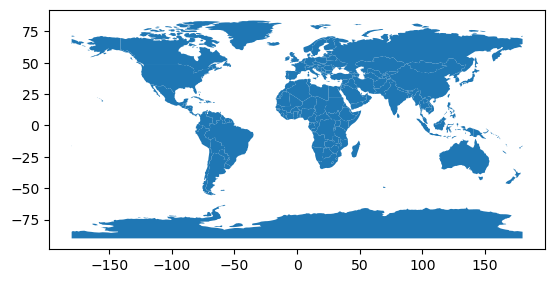

In [175]:
# Plot sample map
world.plot()

In [117]:
# Read files
environ = gpd.read_file('update_temperature.csv')
data = pd.read_csv('update_temperature.csv')

In [177]:
# Print sample of the dataset
environ.head()

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States of America,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2


## Choropleth Map of Temperature Changes in Different Countries

This visual aims to show which countries have seen the greatest changes in average temperature. This was done by grouping the country and year attributes, and deriving a 'Temp_Increase' attribute which is the difference in the average temperatures in 2024 and 2000. The countries that have seen the most increase will be closer to a red color while  countries that have seen an increase but not quite as much as others will be closer to a blue color. Countries with no available data are left white.

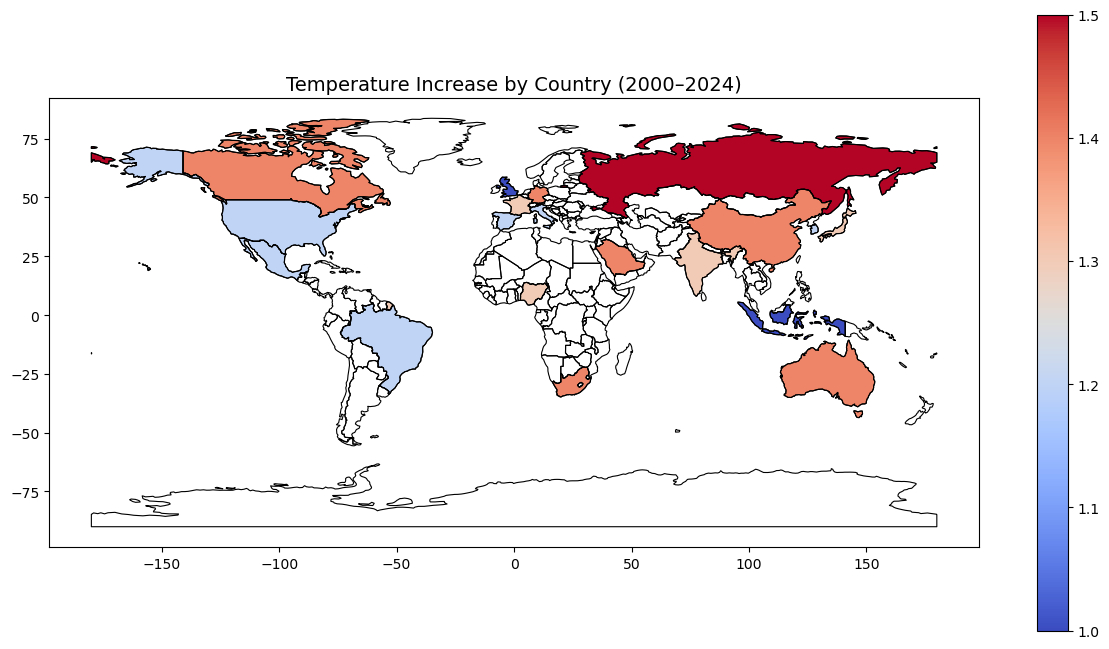

In [187]:
# Make sure year/temp are readable numbers
environ['Year'] = environ['Year'].astype(int)
environ['Avg_Temperature_degC'] = environ['Avg_Temperature_degC'].astype(float)
# Group by country and year
grouped = environ.groupby(['Country', 'Year'])['Avg_Temperature_degC'].mean().unstack()
grouped.columns = grouped.columns.astype(int)

# Create attribute to hold the change in temperature between 2000 and 2024
grouped['Temp_Increase'] = grouped[2024] - grouped[2000]
temp_df = grouped[['Temp_Increase']].reset_index()

# Prepare for merge
temp_df = temp_df.set_index('Country')

# Drop temp increase to allow cell rerun
if 'Temp_Increase' in world.columns:
    world = world.drop(columns=['Temp_Increase'])

# Merge
worldMerged = world.merge(temp_df, how='left', left_on='NAME', right_index=True)

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Plot the map with temp increase attribute
world.boundary.plot(ax=ax, linewidth=0.8, edgecolor='Black')
worldMerged.plot(column='Temp_Increase', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='Black', legend=True)
ax.set_title('Temperature Increase by Country (2000–2024)', fontsize=14)
plt.show()

# Save the figure
fig.savefig('tempMap.png')

### Observations

Out of all the countries the dataset provides data for, Russia has seen the most increase in average temperatures between 2000 and 2024. Indonesia and the United Kingdom have seen the least amount of temperature increases. 
<br>What could contribute to this..?
- Emissions
- Energy Usage
- Climate Zone
- Government Policies

## 3D Scatter Plot of Average Global Temperatures and Sea Level Rise Over Time

This visual aims to show how sea level rise may correlate with average temperatures. Utilizing a 3D scatter plot allows easy viewing of the global temperatures and sea level rise as time passes. The visual has year plotted on the x-axis while the y and z labels show the average temperature and sea level rise. 

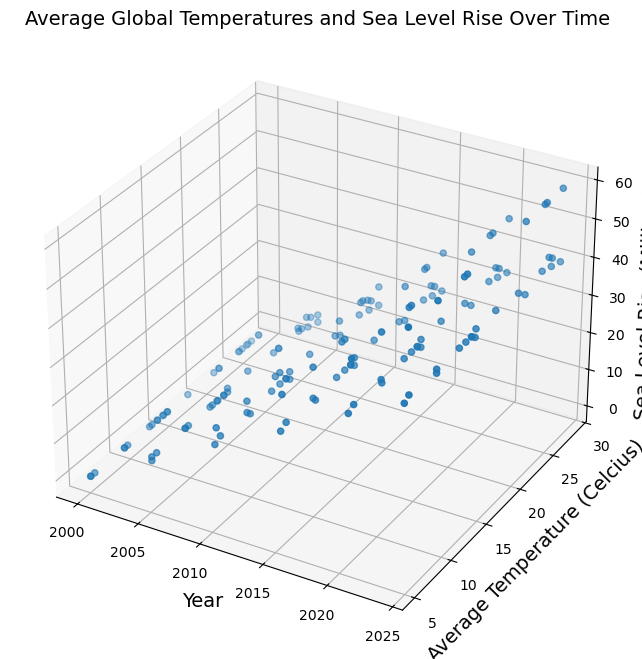

In [189]:
# Create figure and axis
fig = plt.figure(figsize = (15, 8))
ax = plt.axes(projection='3d')
# Plot the year, avg temp, and sea level rise data
ax.scatter(data['Year'], data['Avg_Temperature_degC'], data['Sea_Level_Rise_mm'])
# Set labels
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Average Temperature (Celcius)', fontsize = 14)
ax.set_zlabel('Sea Level Rise (Millimeter)', fontsize = 14)
ax.set_title('Average Global Temperatures and Sea Level Rise Over Time', fontsize = 14)
plt.show()
# Save the figure
fig.savefig('TempvsSea.png')

### Observations

The visual shows an upward trend in temperature and sea level rise as years pass by. This trend can suggest increases in temperature correlates to rising sea levels due to increased temperatures having an impact on glaciers and ice sheets. 

### Heatmap of Annual CO2 Emissions per Capita in Each Country

This visual aims to show which countries have seen the most CO2 emissions per capita annually. Lighter colors indicate greater amounts of CO2 emissions while darker colors indicate fewer amounts of CO2 emissions.

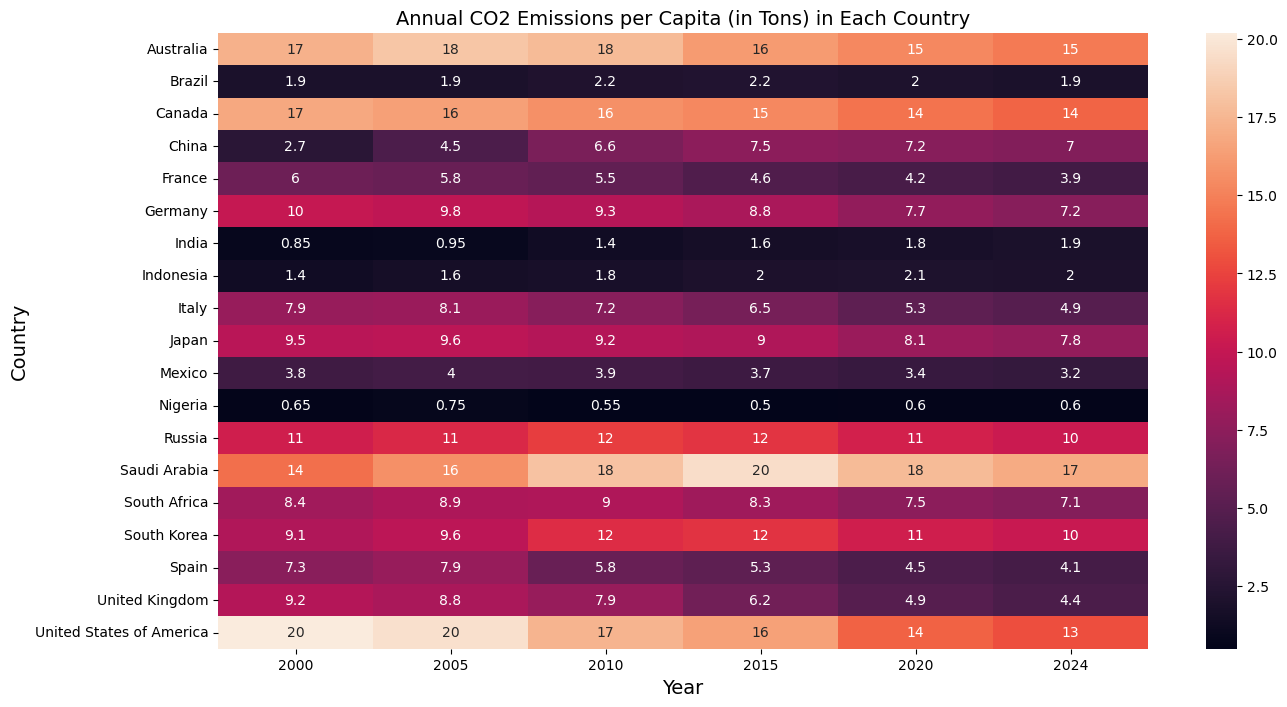

In [191]:
# Create a pivot table to easily put into a seaborn heatmap
dataPivot = data.pivot_table(index = 'Country', columns = 'Year', values = 'CO2_Emissions_tons_per_capita')
# Create the figure
fig = plt.figure(figsize = (15, 8))
# Create heat map
sns.heatmap(dataPivot, annot = True)
# Set labels
plt.ylabel('Country', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.title('Annual CO2 Emissions per Capita (in Tons) in Each Country', fontsize = 14)
plt.show()
# Save the figure
fig.savefig('co2Heatmap.png')

### Observations

The heatmap shows the countries that have the least CO2 emissions per capita include Brazil, India, Indonesia, and Nigeria. Countries that see the most CO2 emissions per capita include the United States of America, Australia, China, and Saudi Arabia. The U.S. has seen improvements in CO2 emissions per capita since 2000 which could suggest the country saw an increase in climate policies. The countries that see low amounts of CO2 emissions per capita can suggest economic development has a role in CO2 emissions. 